In [1]:
# Advertising dataset problem statement to find the effect of different advertising mode on sales.

In [2]:
# import the basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

import os
os.getcwd()

'C:\\Users\\User\\Desktop\\Batch Weekend Feb_4th\\March_4_Regression'

In [3]:
df=pd.read_csv("Advertising.csv")

In [4]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,450.0,17.5,69.2,22.1
1,2,44.5,18.5,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,NaN,18.9,58.5,18.5
4,5,180.8,15.8,58.4,12.9


In [5]:
# lets drop the unwanted column

In [6]:
df=df.drop(["Unnamed: 0"],axis=1)

In [7]:
df.head()

,TV,Radio,Newspaper,Sales
0,450.0,17.5,69.2,22.1
1,44.5,18.5,45.1,10.4
2,17.2,45.9,69.3,9.3
3,NaN,18.9,58.5,18.5
4,180.8,15.8,58.4,12.9


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         197 non-null    float64
 1   Radio      197 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [9]:
df.describe()

,TV,Radio,Newspaper,Sales
count,197.000000,197.000000,200.000000,200.000000
mean,149.696954,22.993401,30.750000,14.022500
std,90.235859,14.665662,22.179668,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,73.400000,10.100000,12.750000,10.375000
50%,149.800000,21.700000,25.750000,12.900000
75%,220.300000,35.600000,45.100000,17.400000
max,450.000000,49.600000,114.000000,27.000000


In [10]:
# skewness and kurtosis 
df.skew()

TV           0.143365
Radio        0.137004
Newspaper    0.937312
Sales        0.407571
dtype: float64

In [11]:
df.kurtosis()

TV          -0.618442
Radio       -1.183558
Newspaper    0.715567
Sales       -0.408869
dtype: float64

In [12]:
#After EDA we can work on preprocessing

In [13]:
#finding the missing value
df.isnull().sum()

TV           3
Radio        3
Newspaper    0
Sales        0
dtype: int64

In [14]:
df.isnull().sum()/len(df)*100

TV           1.5
Radio        1.5
Newspaper    0.0
Sales        0.0
dtype: float64

In [15]:
# checking outliers

<AxesSubplot:>

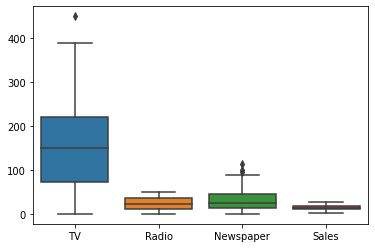

In [16]:
sns.boxplot(data=df)

In [17]:
# we can use histogram also to see the skewness trend 

In [18]:
# handling the missing value: mean , median, mode

In [19]:
df["TV"]=df["TV"].fillna(df["TV"].median())# it will input the median 

In [20]:
df["Radio"]=df["Radio"].fillna(df["Radio"].mean())# it will input the mean value 

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


<AxesSubplot:xlabel='Sales', ylabel='Density'>

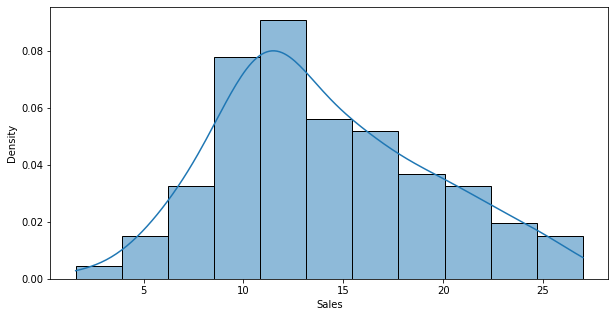

In [22]:
plt.figure(figsize=(10,5))
sns.histplot(df["Sales"],stat="density",kde=True)

In [23]:
# Handling outlier- IQR approach


In [24]:
Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
IQR=Q3-Q1
Upper_fence=Q3+1.5*IQR
Lower_fence=Q1-1.5*IQR
print("Upper Fence \n" , Upper_fence)
print("Lower Fence \n" , Lower_fence)

Upper Fence 
 TV           437.8000
Radio         73.2500
Newspaper     93.6250
Sales         27.9375
dtype: float64
Lower Fence 
 TV          -143.2000
Radio        -27.5500
Newspaper    -35.7750
Sales         -0.1625
dtype: float64


In [25]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,149.698500,22.993401,30.750000,14.022500
std,89.553107,14.554697,22.179668,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.675000,10.250000,12.750000,10.375000
50%,149.800000,22.150000,25.750000,12.900000
75%,219.925000,35.450000,45.100000,17.400000
max,450.000000,49.600000,114.000000,27.000000


In [26]:
df.head()

,TV,Radio,Newspaper,Sales
0,450.0,17.5,69.2,22.1
1,44.5,18.5,45.1,10.4
2,17.2,45.9,69.3,9.3
3,149.8,18.9,58.5,18.5
4,180.8,15.8,58.4,12.9


In [27]:
# Square root approach help us data transformation towards more normality 
# it also do the scaling
# it also help outlier treatment

In [31]:
df=np.sqrt(df)

In [32]:
df.head()

,TV,Radio,Newspaper,Sales
0,21.213203,4.183300,8.318654,4.701064
1,6.670832,4.301163,6.715653,3.224903
2,4.147288,6.774954,8.324662,3.049590
3,12.239281,4.347413,7.648529,4.301163
4,13.446189,3.974921,7.641989,3.591657


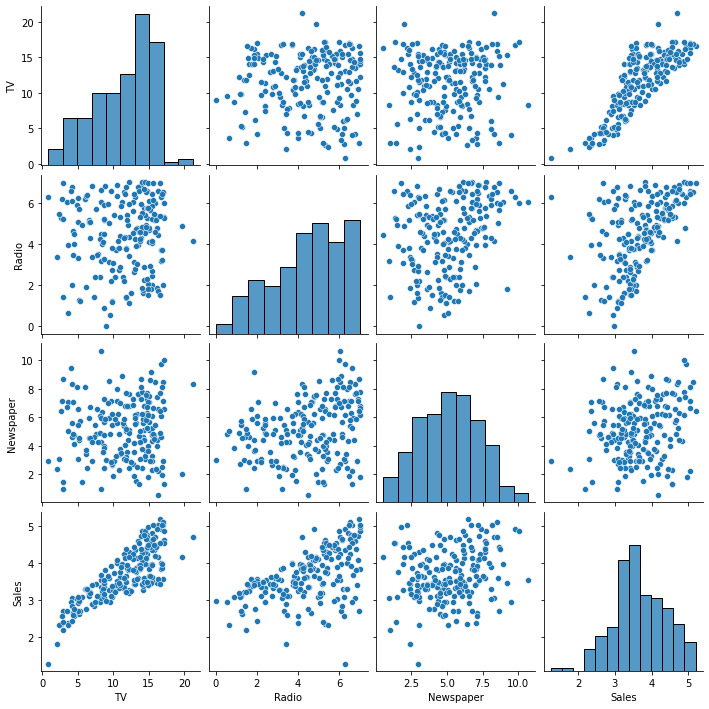

In [33]:
# pairplot 
sns.pairplot(df)

In [35]:
corr=df.corr(method="spearman")

<AxesSubplot:>

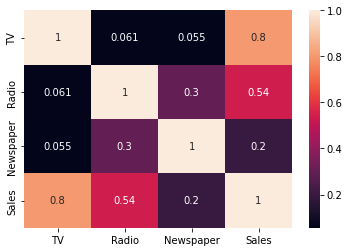

In [38]:
sns.heatmap(corr,annot=True)

In [39]:
df.head()

,TV,Radio,Newspaper,Sales
0,21.213203,4.183300,8.318654,4.701064
1,6.670832,4.301163,6.715653,3.224903
2,4.147288,6.774954,8.324662,3.049590
3,12.239281,4.347413,7.648529,4.301163
4,13.446189,3.974921,7.641989,3.591657


In [ ]:
# now are data is ready to play, we can apply algorithm

In [ ]:
# split the data in independent and dependent variable

In [41]:
X=df.drop(["Sales"],axis=1)
Y=df["Sales"]

In [42]:
X.head()

,TV,Radio,Newspaper
0,21.213203,4.183300,8.318654
1,6.670832,4.301163,6.715653
2,4.147288,6.774954,8.324662
3,12.239281,4.347413,7.648529
4,13.446189,3.974921,7.641989


In [ ]:
# working on OLS algorithm ( adding a constant is required)

In [43]:
import statsmodels.api as sm # required for adding a constant
X=sm.add_constant(X)

In [44]:
X.head()

,const,TV,Radio,Newspaper
0,1.0,21.213203,4.183300,8.318654
1,1.0,6.670832,4.301163,6.715653
2,1.0,4.147288,6.774954,8.324662
3,1.0,12.239281,4.347413,7.648529
4,1.0,13.446189,3.974921,7.641989


In [ ]:
# split the data into training and testing

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,train_size=0.75,random_state=110)

In [ ]:
# Model building - linear regression from sklearn

In [48]:
from sklearn.linear_model import LinearRegression

In [49]:
lin_mod=LinearRegression()

In [50]:
lin_mod.fit(X_train,Y_train)

LinearRegression()

LinearRegression()

-0.7501845317039124

In [51]:
print(lin_mod.intercept_)

1.223886425196619


In [52]:
print(lin_mod.coef_)

[0.         0.13773378 0.18577039 0.00705425]


In [ ]:
# checking the performance of model

In [53]:
Y_predict=lin_mod.predict(X_test)

In [54]:
Y_predict

array([4.20134528, 3.64068471, 4.71917151, 4.42700632, 3.19519143,
       2.97088566, 3.3266001 , 4.28863953, 3.40935108, 3.42939435,
       3.99099486, 3.71292441, 4.39725032, 4.15101327, 2.60693455,
       4.57111015, 4.47473405, 4.52670389, 4.80470764, 3.256721  ,
       3.9593506 , 3.10443015, 4.61572843, 4.15321402, 3.29629277,
       3.75414938, 4.40181596, 3.04844847, 3.47525553, 2.82578498,
       4.38551014, 3.12982345, 3.58710061, 4.83763441, 3.5677335 ,
       3.16931856, 3.65999971, 4.16091266, 3.36643214, 4.54433605,
       3.740562  , 3.83582357, 3.77971084, 3.65083977, 3.72844895,
       3.91218328, 4.86810443, 1.87558251, 2.84796365, 3.83907536])

In [55]:
Y_test

168    4.135215
197    3.577709
147    5.039841
124    4.438468
140    3.301515
65     3.049590
151    3.405877
20     4.242641
71     3.521363
86     3.464102
41     4.135215
100    3.420526
28     4.347413
27     3.987480
119    2.569047
42     4.549725
185    4.753946
55     4.868265
198    5.049752
79     3.316625
118    3.987480
138    3.098387
30     4.626013
187    4.159327
82     3.361547
77     3.768289
53     4.604346
191    3.146427
135    3.405877
10     2.932576
92     4.404543
38     3.178050
116    3.492850
183    5.118594
115    3.549648
29     3.240370
161    3.646917
105    4.381780
6      3.435113
111    4.669047
165    3.449638
25     3.464102
43     3.591657
63     3.741657
181    3.492850
103    3.834058
11     4.171331
108    2.302173
32     3.098387
21     3.535534
Name: Sales, dtype: float64

In [ ]:
# how to evaluate the performance -- regression model
# r2_score--- accuracy
# sum of square error
# absolute error

In [57]:
from sklearn.metrics import r2_score,median_absolute_error,mean_squared_error

In [58]:
r2_score(Y_predict,Y_test)

0.9062813385996977

In [59]:
mean_squared_error(Y_predict,Y_test)

0.03868713110924648

In [60]:
median_absolute_error(Y_predict,Y_test)

0.08504739270109596

In [ ]:
#lets make the prediction using OLS method

In [61]:
from statsmodels.regression.linear_model import OLS
import statsmodels.regression.linear_model as smf

In [65]:
OLS_training=smf.OLS(Y,X)

In [67]:
OLS_training=OLS_training.fit()

In [68]:
OLS_training.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     626.0
Date:                Sat, 04 Mar 2023   Prob (F-statistic):          4.22e-100
Time:                        11:26:48   Log-Likelihood:                 21.167
No. Observations:                 200   AIC:                            -34.33
Df Residuals:                     196   BIC:                            -21.14
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.2157      0.065     18.684      0.000       1.087       1.344
TV             0.1341      0.004     36.178      0.000       0.127       0.141
Radio          0.1934      0.009     20.731      0.000       0.175       0.212
Newspaper      0.0110      0.008      1.396      0.164      -0.005       0.027
==============================================================================
Omnibus:                       63.904   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              348.110
Skew:                          -1.085   Prob(JB):                     2.56e-76
Kurtosis:                       9.088   Cond. No.                         58.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [69]:
print(OLS_training.bse)

const        0.065066
TV           0.003705
Radio        0.009329
Newspaper    0.007909
dtype: float64


In [71]:
OLS_training1=smf.OLS(Y,X1)
OLS_training1=OLS_training1.fit()
OLS_training1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.274
Model:                            OLS   Adj. R-squared:                  0.267
Method:                 Least Squares   F-statistic:                     37.24
Date:                Sat, 04 Mar 2023   Prob (F-statistic):           1.91e-14
Time:                        11:50:04   Log-Likelihood:                -182.67
No. Observations:                 200   AIC:                             371.3
Df Residuals:                     197   BIC:                             381.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.6480      0.143     18.554      0.000       2.367       2.929
Radio          0.2039      0.026      7.910      0.000       0.153       0.255
Newspaper      0.0230      0.022      1.051      0.294      -0.020       0.066
==============================================================================
Omnibus:                       39.769   Durbin-Watson:                   2.036
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               63.077
Skew:                          -1.077   Prob(JB):                     2.01e-14
Kurtosis:                       4.712   Cond. No.                         24.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""